Time series forecasting: A naive prediction of the future 

In [2]:
import pandas as pd 
pd.__version__

import numpy as np
np.__version__

import matplotlib.pyplot as plt


import matplotlib.dates as mdates 

import the Johnson & Johnson dataset for this section

In [3]:
df = pd.read_csv(r"C:\Users\user\OneDrive\Documents\ML learning\Time series forecasting datasets\jj.csv")

In [5]:
df.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [6]:
df.tail()

#the 4 quarters of 1980 is what we will try to forecast using  our baseline model 
#the closer our forecasts are to the observed values, the better 

,date,data
79,1979-10-01,9.99
80,1980-01-01,16.20
81,1980-04-01,14.67
82,1980-07-02,16.02
83,1980-10-01,11.61


In [7]:
#split the data into train and test. Train set starts in 1960-1979 and test set starts in 1980
#our horizon is one year only 

train = df[:-4] #all data except last 4 entries
test = df[-4:]

Implement a historical mean baseline:

In [8]:
historical_mean = np.mean(train['data'])

historical_mean 

#this means from 1960-1979, quartely EPS of J&J was an average of 4.31

np.float64(4.308499987499999)

In [10]:
#naively forecasting this value for each quarter of 1980
# create a new column to hold the historical mean of the training set as a forecast:

test.loc[:,'pred_mean'] = historical_mean

C:\Users\user\AppData\Local\Temp\ipykernel_24384\3007783545.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:,'pred_mean'] = historical_mean


In [11]:
#Use Mean Absolute Percentage Error to evaluate performance of our forecast on the test set

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [12]:
mape_hist_mean = mape(test['data'], test['pred_mean'])

mape_hist_mean

np.float64(70.00752579965119)

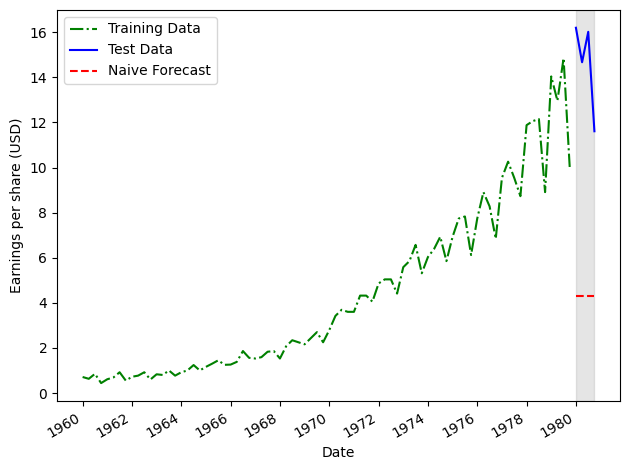

In [13]:
#70% means our baseline deviates by 70% from the observed quartely in 1980 
#visualize the results

fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-.', label = 'Training Data')
ax.plot(test['date'], test['data'], 'b-', label = 'Test Data') 
ax.plot(test['date'], test['pred_mean'], 'r--', label = 'Naive Forecast')

ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha = 0.2)
ax.legend(loc=2)

plt.xticks (np.arange(0,85, 8), ['1960', '1962', '1964', '1966', '1968', '1970', '1972', '1974', '1976', '1978', '1980'])

fig.autofmt_xdate()
plt.tight_layout()

Improving by forecasting the last year's mean 

In [18]:
last_year_mean = np.mean(train['data'][-4:])

last_year_mean

np.float64(12.96)

In [19]:
#create a new col to hold the last year mean as a forecast

test.loc[:,'pred_last_year_mean'] = last_year_mean

C:\Users\user\AppData\Local\Temp\ipykernel_24384\2534815949.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:,'pred_last_year_mean'] = last_year_mean


In [20]:
mape_last_year_mean = mape(test['data'], test['pred_last_year_mean'])

print(mape_last_year_mean)  #mape of 15%, closer than that of 70%

15.5963680725103


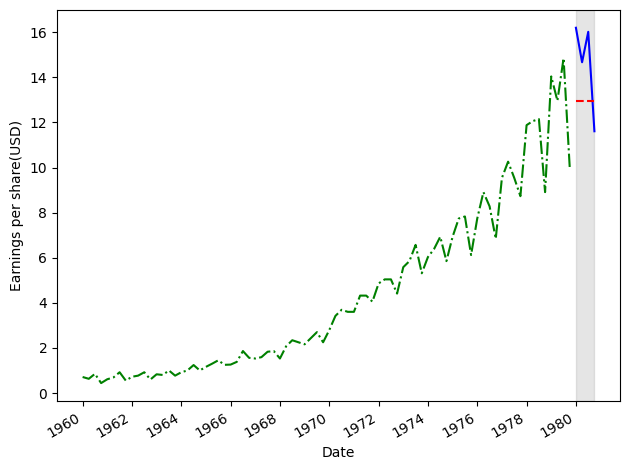

In [22]:
fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-.', label = 'Training Data')
ax.plot(test['date'], test['data'], 'b-', label = 'Test Data')
ax.plot(test['date'], test['pred_last_year_mean'], 'r--', label = 'Naive Forecast')

ax.set_xlabel("Date")
ax.set_ylabel("Earnings per share(USD)")
ax.axvspan(80, 83, color='#808080', alpha = 0.2)

plt.xticks(np.arange(0,85, 8), ['1960', '1962', '1964', '1966', '1968', '1970', '1972', '1974', '1976', '1978', '1980'])

fig.autofmt_xdate()

plt.tight_layout()

autocorrelation is observed above; future values depending on past values that are not too far back in history. 

Predicting using the last known value 

In [23]:
last_val = train['data'].iloc[-1]

last_val
#9.9$ is the recorded value in the last quarter of 1979

np.float64(9.99)

In [24]:
test.loc[:, "pred_last"] = last_val  #create new col called pred_last to hold the predictions 

C:\Users\user\AppData\Local\Temp\ipykernel_24384\3099186994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, "pred_last"] = last_val


In [25]:
mape_last = mape(test['data'], test['pred_last'])  #pass test set and prediciton col for eval 

print(mape_last)

30.457277908606535


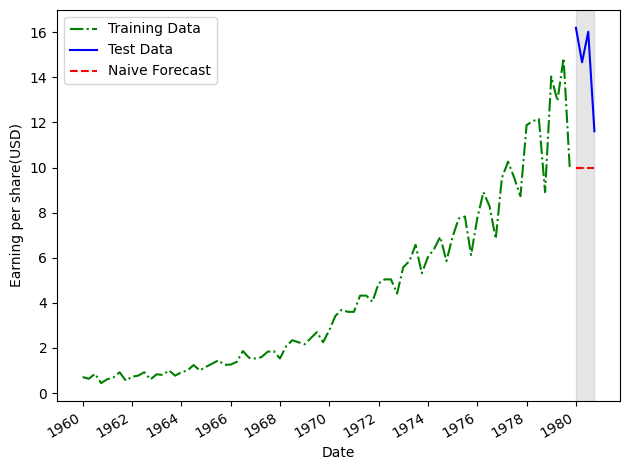

In [29]:
#visualize 

fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-.', label = 'Training Data')
ax.plot(test['date'], test['data'], "b-", label = 'Test Data')
ax.plot(test['date'], test['pred_last'], 'r--', label = 'Naive Forecast')

ax.set_xlabel("Date")
ax.set_ylabel("Earning per share(USD)")
ax.axvspan(80, 83, color='#808080', alpha = 0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0,83, 8), ['1960', '1962', '1964', '1966', '1968', '1970', '1972', '1974', '1976', '1978', '1980'])

fig.autofmt_xdate()
plt.tight_layout()

Implementing the naive seasonal forecast 

In [31]:
#takes the last observed cycle and repeats into the future

test.loc[:, "pred_last_season"] = train["data"][-4:].values

C:\Users\user\AppData\Local\Temp\ipykernel_24384\2584858648.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, "pred_last_season"] = train["data"][-4:].values


In [32]:
mape_naive_seasonal = mape(test['data'], test['pred_last_season'])

mape_naive_seasonal

np.float64(11.561658552433654)

Conclusion: 

>   lowest MAPE observed

>   seasonality plays a huge role in determining future values 